In [1]:
library("FactoMineR")
library("factoextra")

Warning message:
"package 'FactoMineR' was built under R version 3.5.3"Warning message:
"package 'factoextra' was built under R version 3.5.3"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.5.3"Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


In [6]:
wdbc <- read.csv("wdbc.data", header = F)

features <- c("radius", "texture", "perimeter", 
              "area", "smoothness", "compactness", 
              "concavity", "concave_points", 
              "symmetry", "fractal_dimension")
names(wdbc) <- c(
    "id", 
    "diagnosis", 
    paste0(features,"_mean"), 
    paste0(features,"_se"), 
    paste0(features,"_worst")
)
head(wdbc, 4)

id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300


In [9]:
wdbc.active <- wdbc[,-c(1,2)]
head(wdbc.active, 4)

radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300


In [10]:
res.pca <- PCA(wdbc.active, graph = FALSE)
print(res.pca)

**Results for the Principal Component Analysis (PCA)**
The analysis was performed on 569 individuals, described by 30 variables
*The results are available in the following objects:

   name               description                          
1  "$eig"             "eigenvalues"                        
2  "$var"             "results for the variables"          
3  "$var$coord"       "coord. for the variables"           
4  "$var$cor"         "correlations variables - dimensions"
5  "$var$cos2"        "cos2 for the variables"             
6  "$var$contrib"     "contributions of the variables"     
7  "$ind"             "results for the individuals"        
8  "$ind$coord"       "coord. for the individuals"         
9  "$ind$cos2"        "cos2 for the individuals"           
10 "$ind$contrib"     "contributions of the individuals"   
11 "$call"            "summary statistics"                 
12 "$call$centre"     "mean of the variables"              
13 "$call$ecart.type" "standard error 

In [11]:
eig.val <- get_eigenvalue(res.pca)
eig.val

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,1.328161e+01,4.427203e+01,44.27203
Dim.2,5.691355e+00,1.897118e+01,63.24321
Dim.3,2.817949e+00,9.393163e+00,72.63637
Dim.4,1.980640e+00,6.602135e+00,79.23851
Dim.5,1.648731e+00,5.495768e+00,84.73427
Dim.6,1.207357e+00,4.024522e+00,88.75880
Dim.7,6.752201e-01,2.250734e+00,91.00953
Dim.8,4.766171e-01,1.588724e+00,92.59825
Dim.9,4.168948e-01,1.389649e+00,93.98790
Dim.10,3.506935e-01,1.168978e+00,95.15688


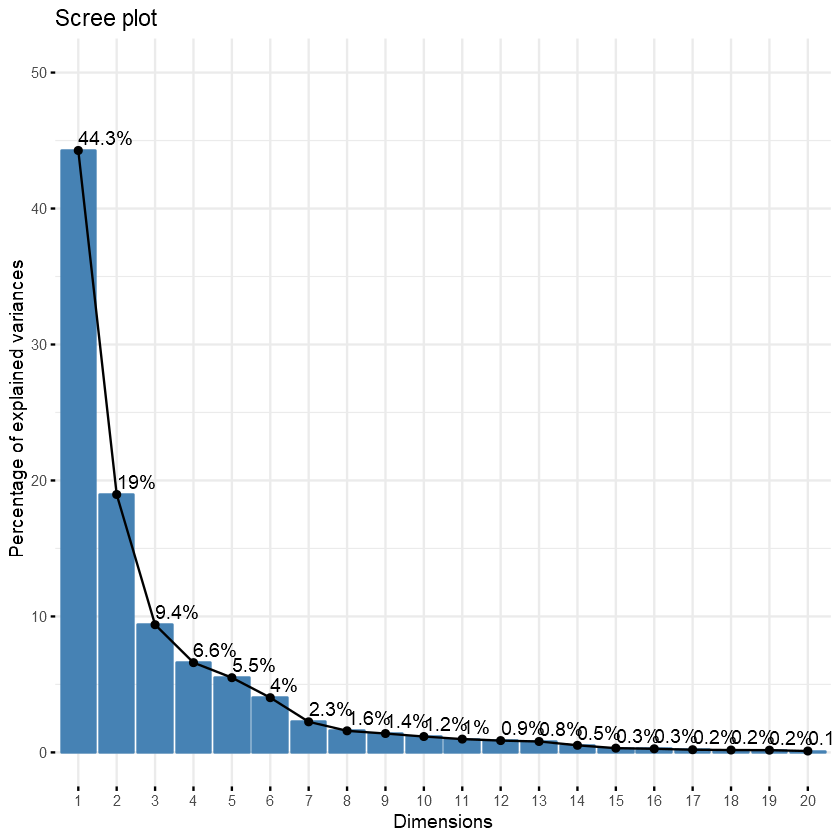

In [15]:
fviz_eig(res.pca, addlabels = TRUE, ylim = c(0, 50), ncp = 20)

In [16]:
var <- get_pca_var(res.pca)
var

Principal Component Analysis Results for variables
  Name       Description                                    
1 "$coord"   "Coordinates for the variables"                
2 "$cor"     "Correlations between variables and dimensions"
3 "$cos2"    "Cos2 for the variables"                       
4 "$contrib" "contributions of the variables"               

In [17]:
# Coordinates
head(var$coord)
# Cos2: quality on the factore map
head(var$cos2)
# Contributions to the principal components
head(var$contrib)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
radius_mean,0.7977668,-0.5579027,-0.01432118,-0.05827700,-0.04851878
texture_mean,0.3780132,-0.1424382,0.10835829,0.84870380,0.06351944
perimeter_mean,0.8292355,-0.5133487,-0.01563555,-0.05908501,-0.04799015
area_mean,0.8053928,-0.5512695,0.04817717,-0.07520017,-0.01326563
smoothness_mean,0.5196530,0.4440017,-0.17507219,-0.22430770,0.46878427
compactness_mean,0.8720501,0.3623611,-0.12437565,-0.04474618,-0.01502824


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
radius_mean,0.6364318,0.31125539,0.0002050963,0.003396209,0.0023540715
texture_mean,0.1428940,0.02028864,0.0117415199,0.720298141,0.0040347193
perimeter_mean,0.6876316,0.26352690,0.0002444703,0.003491038,0.0023030547
area_mean,0.6486576,0.30389811,0.0023210397,0.005655066,0.0001759769
smoothness_mean,0.2700393,0.19713747,0.0306502709,0.050313944,0.2197586899
compactness_mean,0.7604714,0.13130559,0.0154693024,0.002002220,0.0002258480


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
radius_mean,4.791828,5.4689158,0.007278210,0.1714702,0.14278085
texture_mean,1.075879,0.3564817,0.416669002,36.3669303,0.24471672
perimeter_mean,5.177322,4.6303018,0.008675469,0.1762581,0.13968654
area_mean,4.883878,5.3396446,0.082366279,0.2855170,0.01067348
smoothness_mean,2.033182,3.4638057,1.087680124,2.5402866,13.32896332
compactness_mean,5.725748,2.3071061,0.548956087,0.1010895,0.01369829


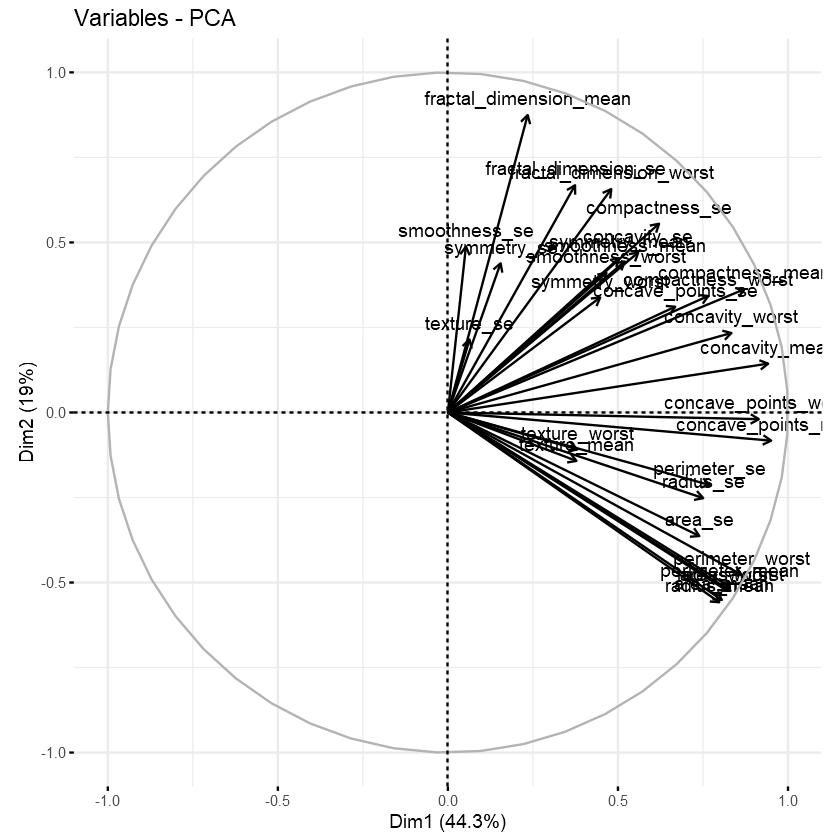

In [18]:
fviz_pca_var(res.pca, col.var = "black")

Warning message:
"package 'corrplot' was built under R version 3.5.3"corrplot 0.84 loaded


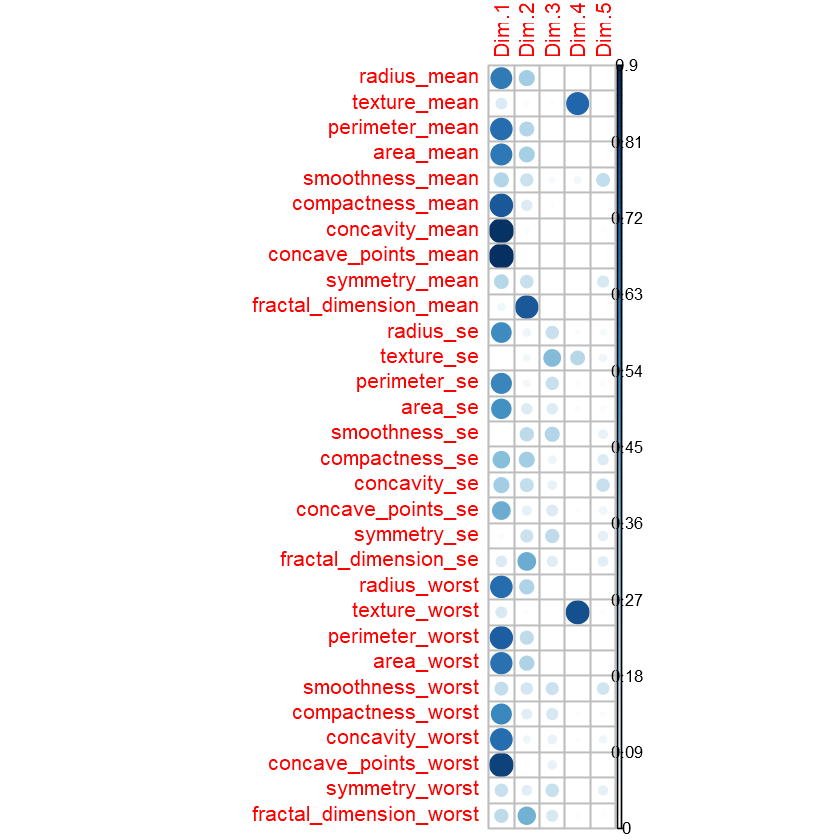

In [19]:
library("corrplot")
corrplot(var$cos2, is.corr=FALSE)

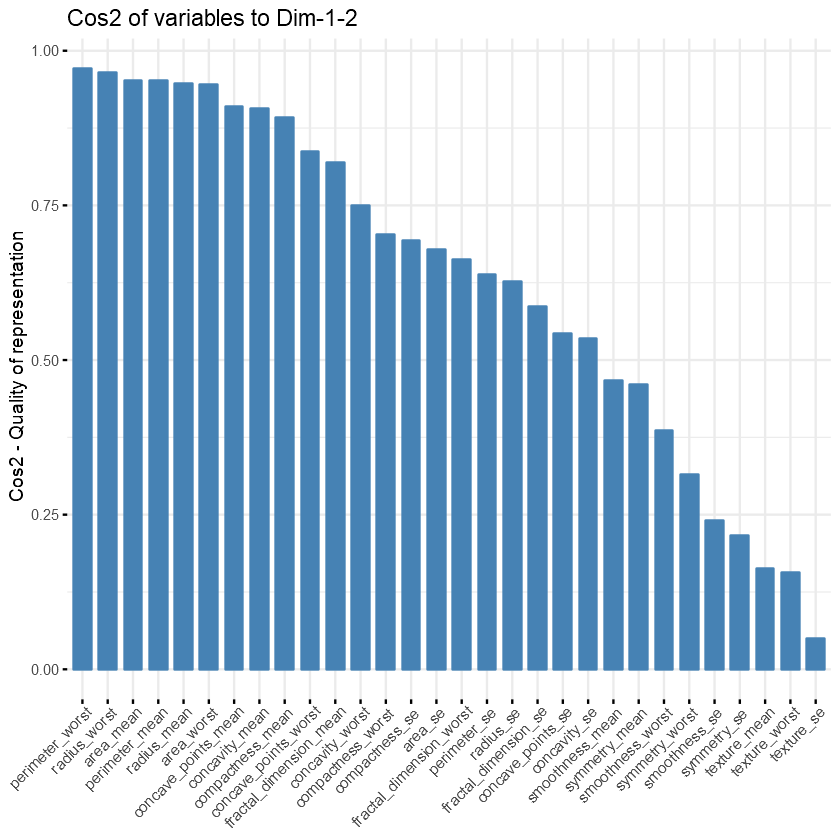

In [20]:
# Total cos2 of variables on Dim.1 and Dim.2
fviz_cos2(res.pca, choice = "var", axes = 1:2)

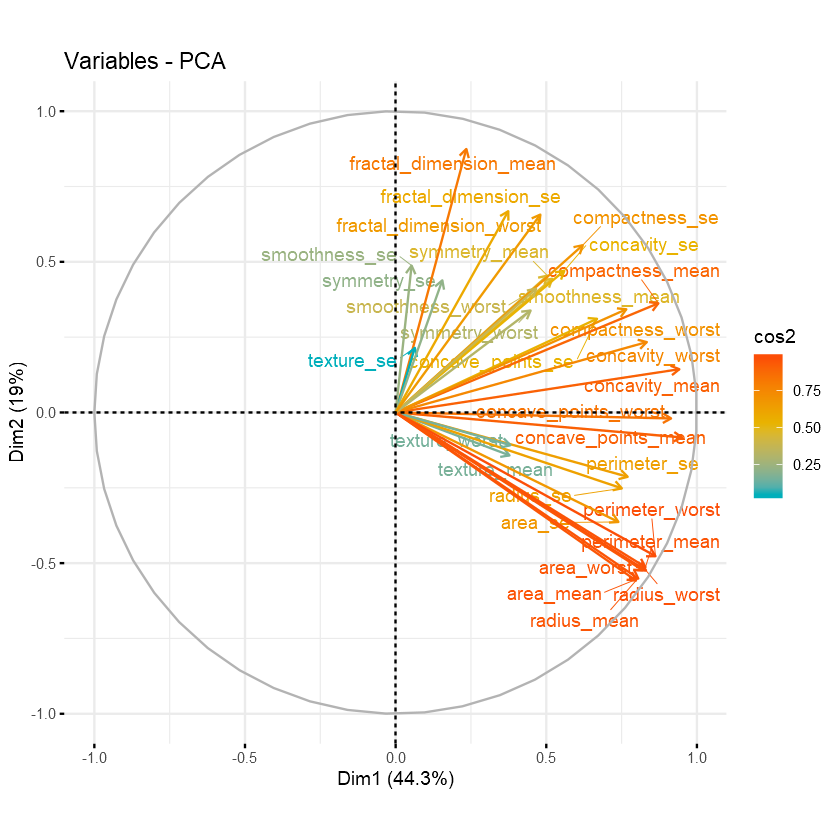

In [21]:
# Color by cos2 values: quality on the factor map
fviz_pca_var(res.pca, col.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), 
             repel = TRUE # Avoid text overlapping
             )

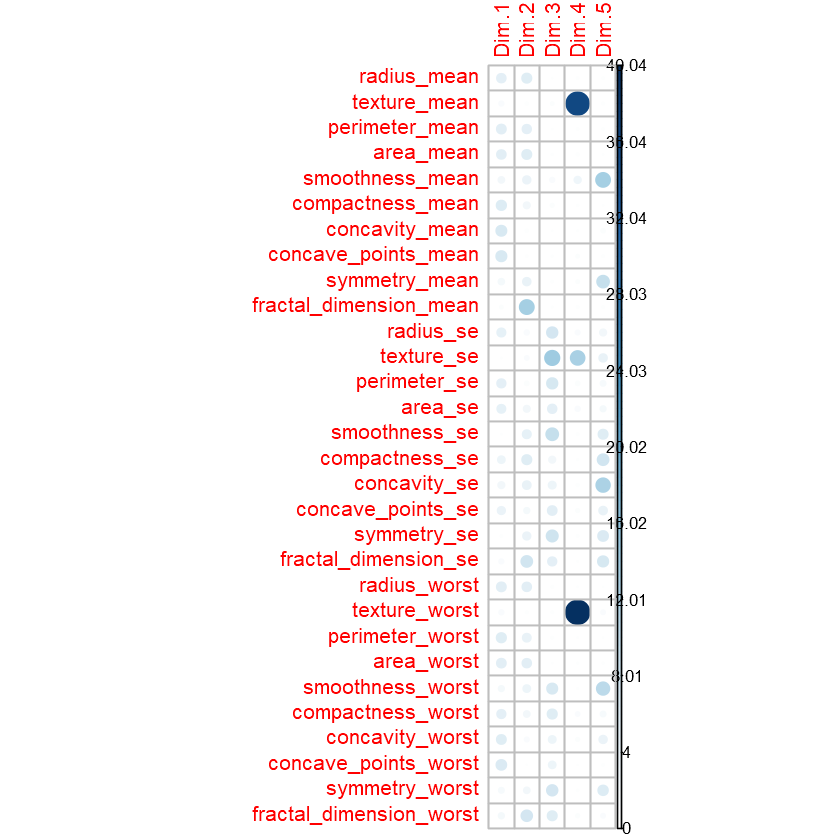

In [22]:
library("corrplot")
corrplot(var$contrib, is.corr=FALSE)

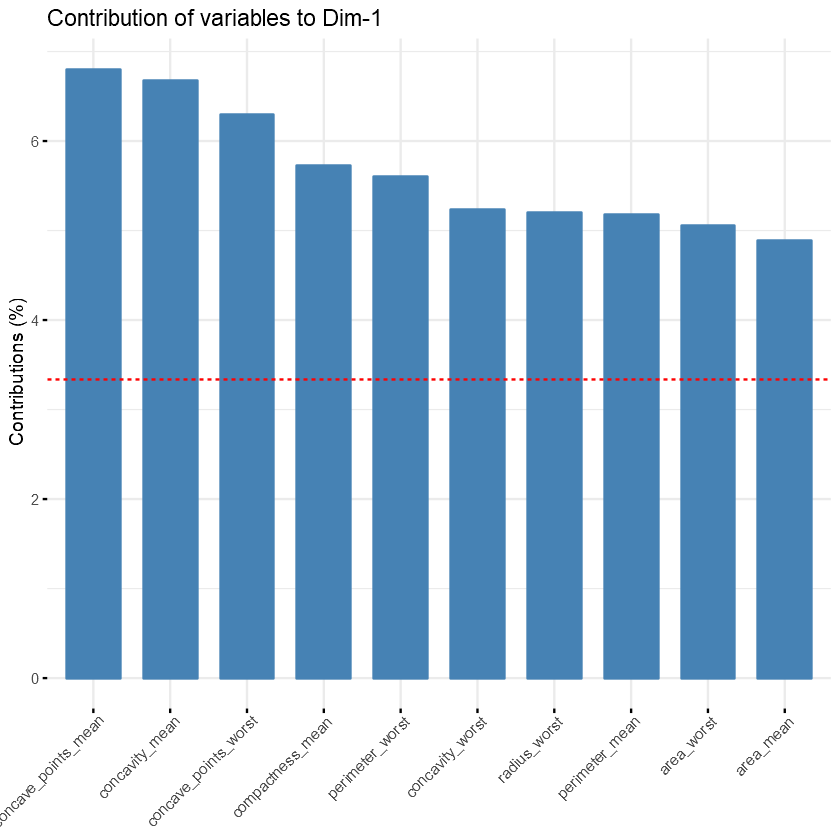

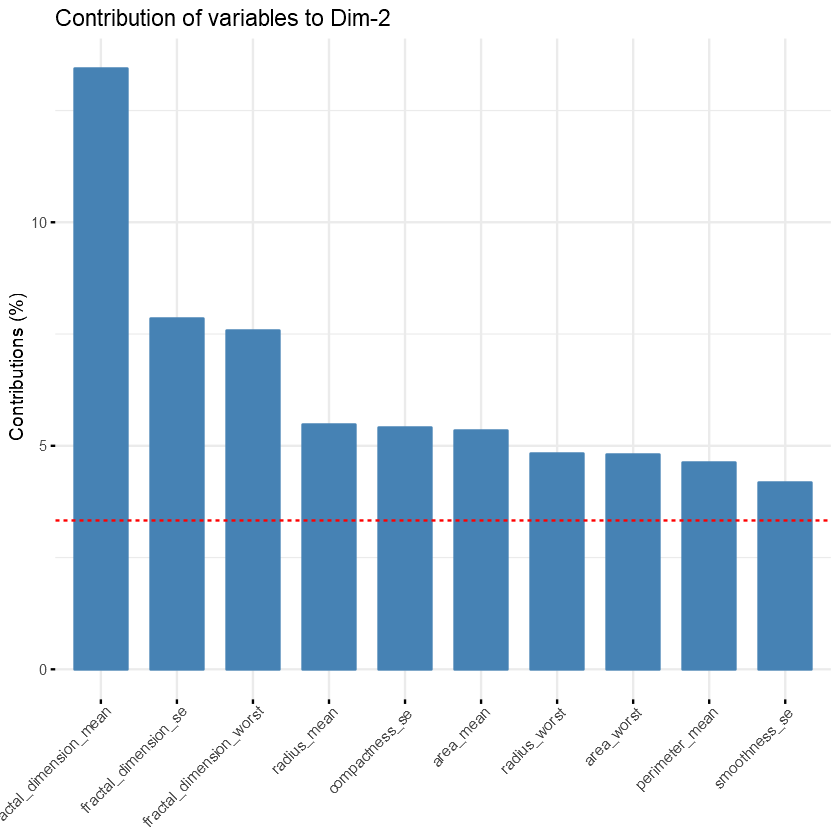

In [23]:
# Contributions of variables to PC1
fviz_contrib(res.pca, choice = "var", axes = 1, top = 10)
# Contributions of variables to PC2
fviz_contrib(res.pca, choice = "var", axes = 2, top = 10)

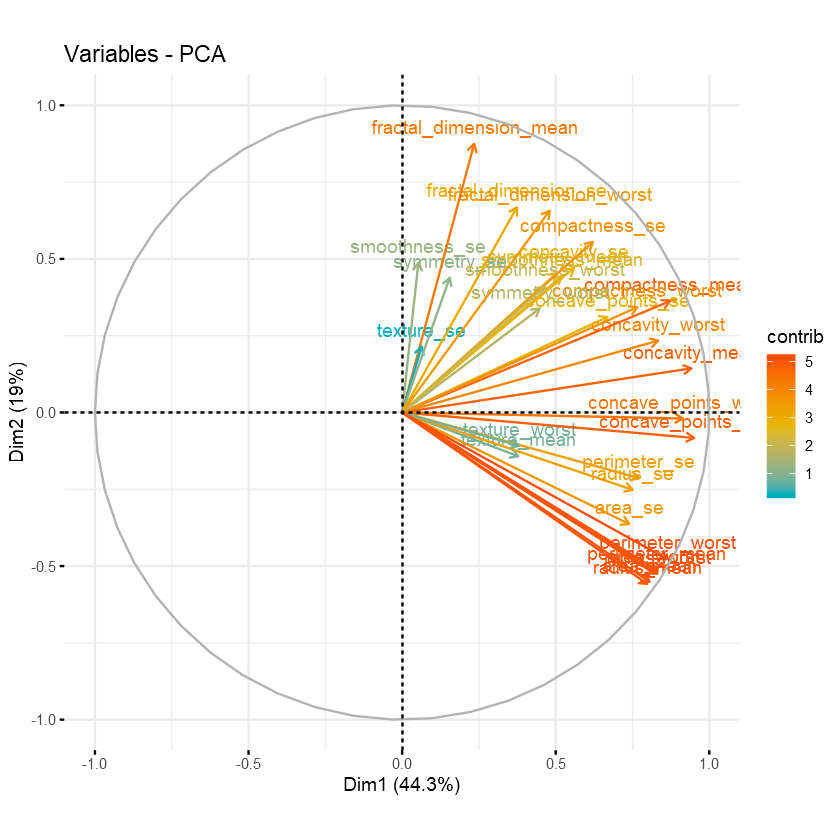

In [24]:
fviz_pca_var(res.pca, col.var = "contrib",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07")
             )

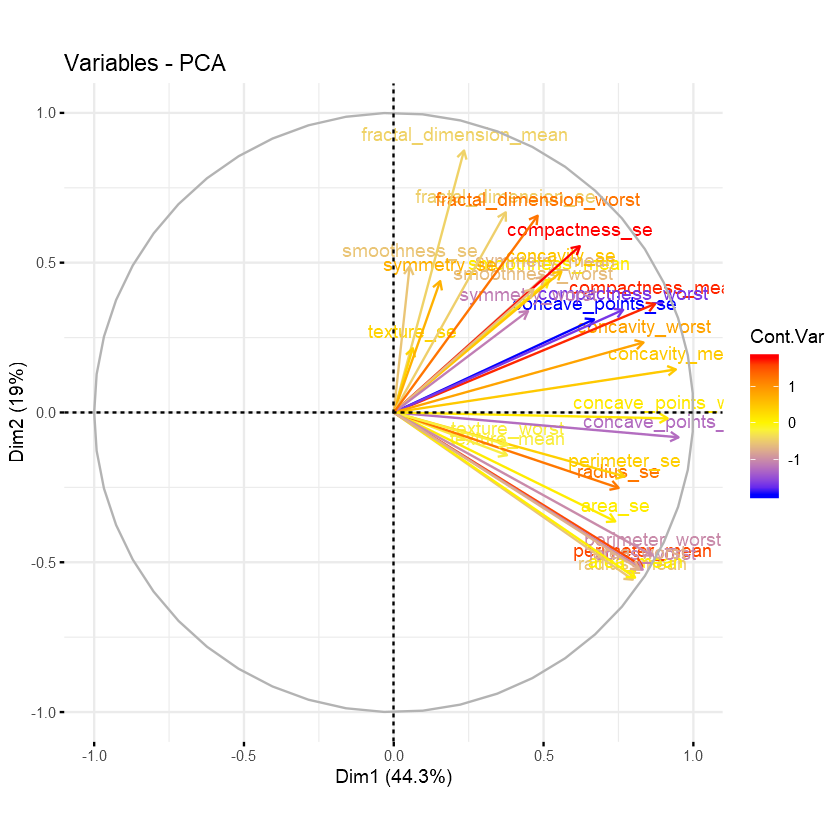

In [26]:
# Create a random continuous variable of length 10
set.seed(123)
my.cont.var <- rnorm(30)
# Color variables by the continuous variable
fviz_pca_var(res.pca, col.var = my.cont.var,
             gradient.cols = c("blue", "yellow", "red"),
             legend.title = "Cont.Var")

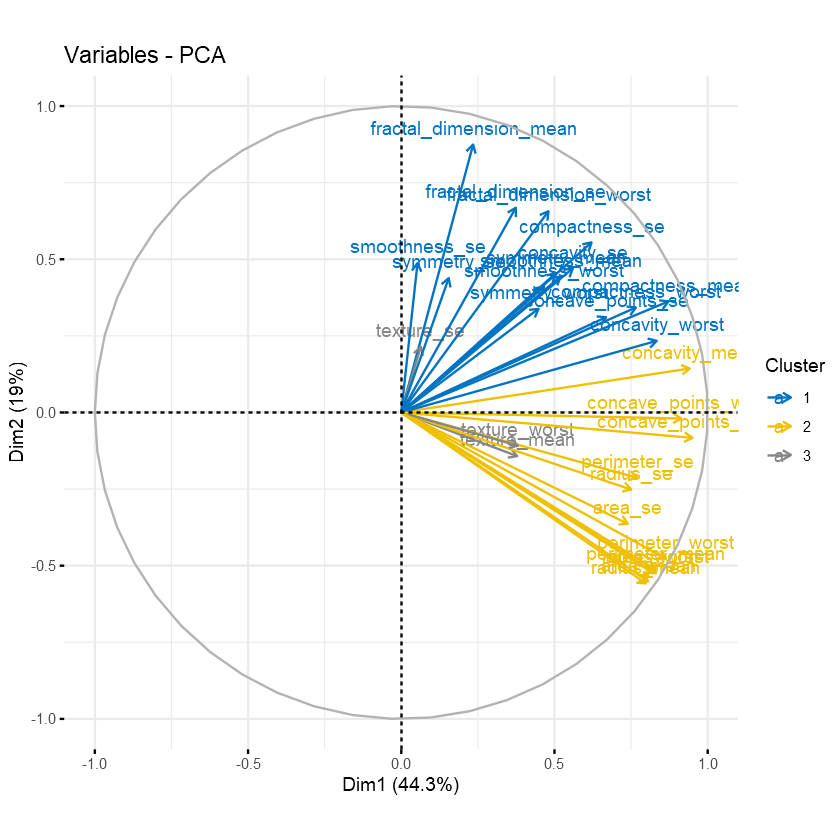

In [27]:
# Create a grouping variable using kmeans
# Create 3 groups of variables (centers = 3)
set.seed(123)
res.km <- kmeans(var$coord, centers = 3, nstart = 25)
grp <- as.factor(res.km$cluster)
# Color variables by groups
fviz_pca_var(res.pca, col.var = grp, 
             palette = c("#0073C2FF", "#EFC000FF", "#868686FF"),
             legend.title = "Cluster")

In [28]:
res.desc <- dimdesc(res.pca, axes = c(1,2), proba = 0.05)
# Description of dimension 1
res.desc$Dim.1

,correlation,p.value
concave_points_mean,0.9506539,2.239690e-290
concavity_mean,0.9417132,1.952712e-270
concave_points_worst,0.9143273,9.464350e-225
compactness_mean,0.8720501,4.285431e-178
perimeter_worst,0.8624082,8.834229e-170
concavity_worst,0.8337190,2.329782e-148
radius_worst,0.8309096,1.749333e-146
perimeter_mean,0.8292355,2.208294e-145
area_worst,0.8195168,3.223940e-139
area_mean,0.8053928,6.810274e-131


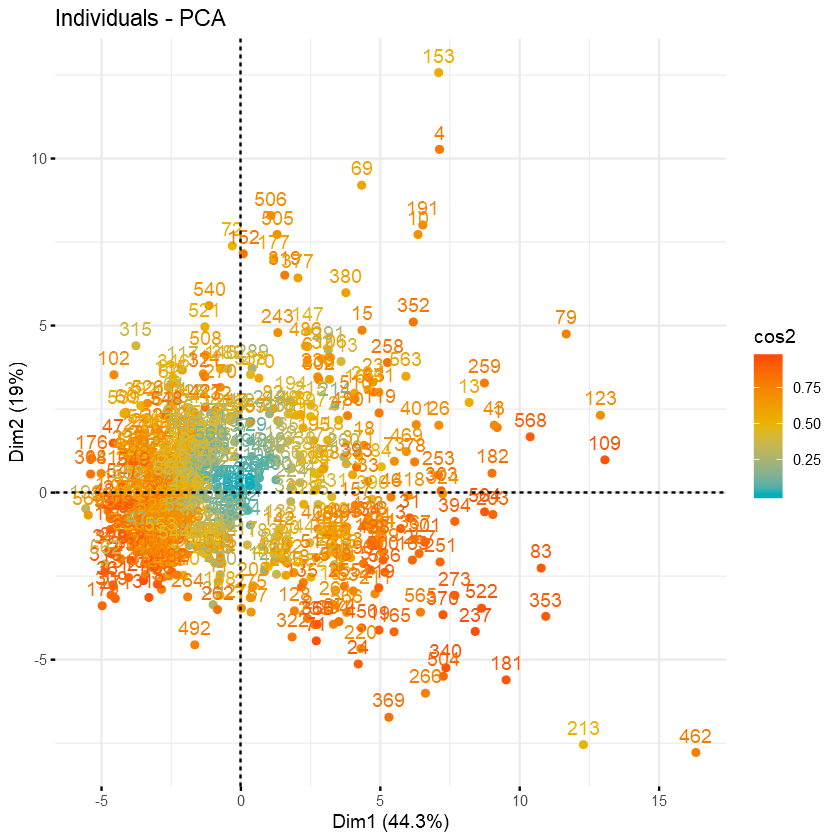

In [33]:
fviz_pca_ind(res.pca, col.ind = "cos2", 
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             )

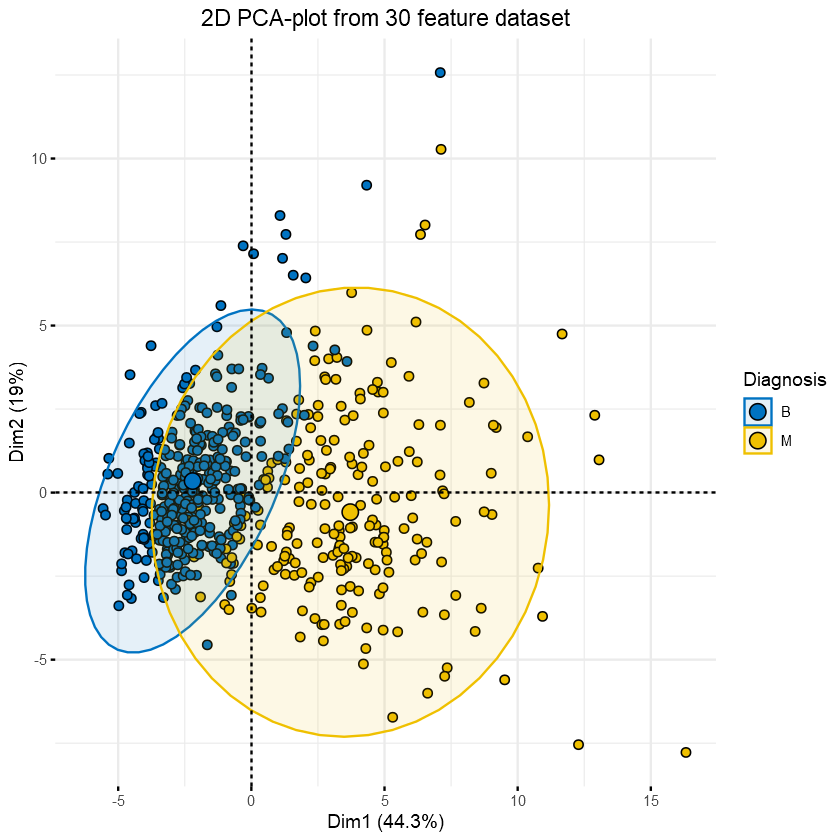

In [37]:
fviz_pca_ind(res.pca, geom.ind = "point", pointshape = 21, 
             pointsize = 2,
             fill.ind = wdbc$diagnosis, 
             col.ind = "black", 
             palette = "jco", 
             addEllipses = TRUE,
             label = "var",
             col.var = "black",
             repel = TRUE,
             legend.title = "Diagnosis") +
  ggtitle("2D PCA-plot from 30 feature dataset") +
  theme(plot.title = element_text(hjust = 0.5))

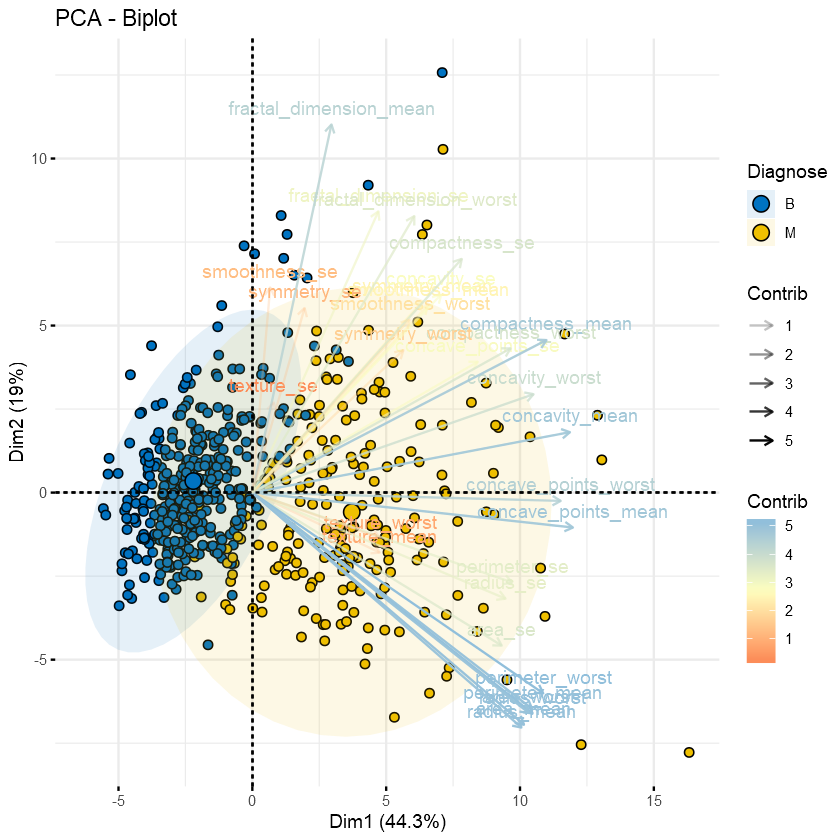

In [41]:
fviz_pca_biplot(res.pca, 
                # Individuals
                geom.ind = "point",
                fill.ind = wdbc$diagnosis, 
                col.ind = "black",
                pointshape = 21, pointsize = 2,
                palette = "jco",
                addEllipses = TRUE,
                # Variables
                alpha.var ="contrib", 
                col.var = "contrib",
                gradient.cols = "RdYlBu",                
                legend.title = list(fill = "Diagnose", color = "Contrib",
                                    alpha = "Contrib")
                )